In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
# Mount Google Drive (for Google Colab users)
from google.colab import drive
drive.mount('/content/drive')

# Define dataset paths
dataset_path = "/content/drive/MyDrive/Road Signs classification dataset/DATA"
test_path = "/content/drive/MyDrive/Road Signs classification dataset/TEST"
labels_path = "/content/drive/MyDrive/Road Signs classification dataset/labels.csv"

Mounted at /content/drive


In [ ]:
import pandas as pd

labels_path = "/content/drive/MyDrive/Road Signs classification dataset/labels.csv"
labels_df = pd.read_csv(labels_path)

# Show first few rows to confirm it loaded correctly
labels_df.head()


,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


In [ ]:
labels_df.tail()

,ClassId,Name
25,25,keep Left
26,26,keep Right
27,27,Roundabout mandatory
28,28,watch out for cars
29,29,Horn


# Data Preprocessing

**Resizing Images**

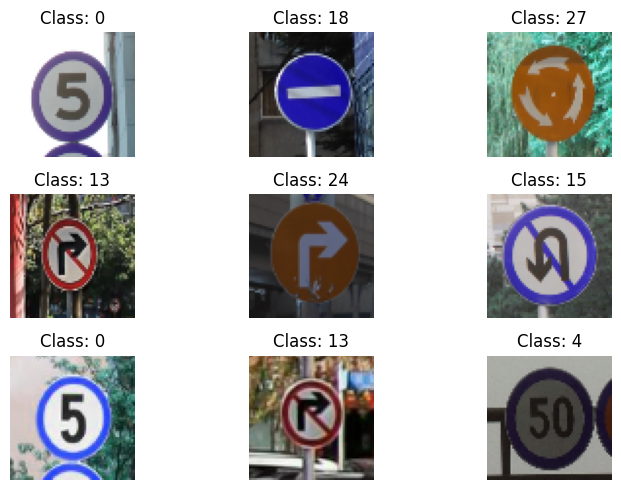

In [ ]:
import matplotlib.pyplot as plt
import random
import os
import cv2

# Assuming 'dataset_path' is the path to your image dataset
dataset_path = "/content/drive/MyDrive/Road Signs classification dataset/DATA"  # Replace with your actual path

# Load images and labels (replace with your actual loading logic)
X = []
y = []
image_size = (64, 64)  # You can change to (32, 32) or (128, 128)

for folder_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder_name)
    if os.path.isdir(folder_path):
        label = int(folder_name)  # Assuming folder names are numeric labels
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            if file_name.lower().endswith(('.jpg', '.png', '.jpeg')):
                image = cv2.imread(file_path)
                if image is not None:
                    image = cv2.resize(image, image_size)  # 🔥 Resize here
                    X.append(image)
                    y.append(label)


# Number of images to display
num_images = 9

# Set up the plot grid
plt.figure(figsize=(8, 5))

for i in range(num_images):
    index = random.randint(0, len(X) - 1)
    image = X[index]
    label = y[index]

    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(f"Class: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

**Normalization**

In [ ]:


# Convert list to numpy array
X = np.array(X)
y = np.array(y)

# Normalize the pixel values
X = X / 255.0

# Check shape and range
print("Shape:", X.shape)
print("Pixel value range:", X.min(), "-", X.max())


Shape: (743, 64, 64, 3)
Pixel value range: 0.0 - 1.0


# Data Augmentation

In [ ]:
pip install tensorflow

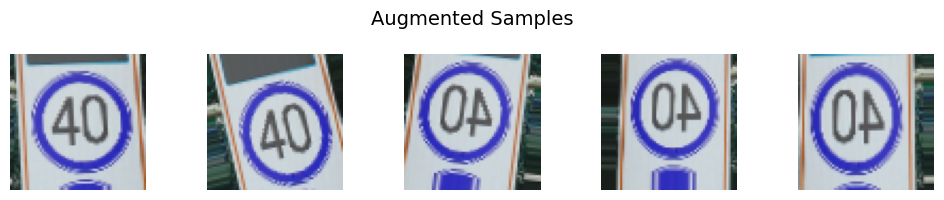

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=15,         # Rotate up to 15 degrees
    width_shift_range=0.1,     # Shift image left/right by 10%
    height_shift_range=0.1,    # Shift image up/down by 10%
    zoom_range=0.1,            # Zoom in/out by 10%
    horizontal_flip=True,      # Flip images horizontally
    fill_mode='nearest'        # Fill empty pixels with nearest values
)

# Fit the generator on your training data
datagen.fit(X)


#You can also visualize augmented images like this:

import matplotlib.pyplot as plt

# Show 5 augmented versions of one image
sample = X[0].reshape(1, *X[0].shape)  # reshape to 4D for flow

plt.figure(figsize=(10, 2))
for i, batch in enumerate(datagen.flow(sample, batch_size=1)):
    plt.subplot(1, 5, i+1)
    plt.imshow(batch[0])
    plt.axis('off')
    if i == 4:
        break
plt.suptitle("Augmented Samples", fontsize=14)
plt.tight_layout()
plt.show()


# Building the Convolutional Neural Network (CNN)

CNN  Architecture Design

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 🧠 Step 1: Define the input shape and number of output classes
input_shape = (64, 64, 3)  # 64x64 image size with 3 color channels (RGB)
num_classes = len(set(y))  # Automatically count number of unique class labels

# 🏗️ Step 2: Build the CNN architecture
model = Sequential()

# 🔹 Convolution Layer 1: Extracts basic features like edges
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))

# 🔹 Convolution Layer 2: Learns more complex features
model.add(Conv2D(64, (3, 3), activation='relu'))

# 🔹 Max Pooling Layer: Reduces the spatial dimensions (downsampling)
model.add(MaxPooling2D(pool_size=(2, 2)))

# 🔹 Convolution Layer 3: Learns even deeper features
model.add(Conv2D(128, (3, 3), activation='relu'))

# 🔹 Max Pooling Layer again to reduce size and computation
model.add(MaxPooling2D(pool_size=(2, 2)))

# 🔹 Flatten: Converts 2D feature maps to 1D vector for Dense layers
model.add(Flatten())

# 🔹 Fully Connected Dense Layer: Learns patterns across all features
model.add(Dense(128, activation='relu'))

# 🔹 Dropout Layer: Prevents overfitting by randomly turning off 50% of neurons
model.add(Dropout(0.5))

# 🔹 Output Layer: Softmax gives probabilities for each class
model.add(Dense(num_classes, activation='softmax'))

# 📝 Print model summary to view architecture
model.summary()

# ⚙️ Step 3: Compile the model
model.compile(
    optimizer=Adam(),                        # Adaptive optimizer that adjusts learning rate
    loss='sparse_categorical_crossentropy',  # Use this when labels are integers (not one-hot)
    metrics=['accuracy']                     # Track accuracy while training
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,308,510 (12.62 MB)

 Trainable params: 3,308,510 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

# Training the Model

**Model Evaluation and Testing**

📊 Data Split:
Train shape     : (520, 64, 64, 3)
Validation shape: (111, 64, 64, 3)
Test shape      : (112, 64, 64, 3)
Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0517 - loss: 3.4345
Epoch 1: val_accuracy improved from -inf to 0.14414, saving model to best_road_sign_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.0520 - loss: 3.4319 - val_accuracy: 0.1441 - val_loss: 3.1780
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 700ms/step - accuracy: 0.1462 - loss: 3.1123
Epoch 2: val_accuracy improved from 0.14414 to 0.36937, saving model to best_road_sign_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 30s 746ms/step - accuracy: 0.1473 - loss: 3.1074 - val_accuracy: 0.3694 - val_loss: 2.5994
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 686ms/step - accuracy: 0.2590 - loss: 2.6374
Epoch 3: val_accuracy improved from 0.36937 to 0.54054, saving model to best_road_sign_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 734ms/step - accuracy: 0.2616 - loss: 2.6317 - val_accuracy: 0.5405 - val_loss: 1.9456
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 755ms/step - accuracy: 0.4524 - loss: 2.1405
Epoch 4: val_accuracy improved from 0.54054 to 0.72973, saving model to best_road_sign_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 801ms/step - accuracy: 0.4543 - loss: 2.1322 - val_accuracy: 0.7297 - val_loss: 1.2595
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 698ms/step - accuracy: 0.6153 - loss: 1.3636
Epoch 5: val_accuracy improved from 0.72973 to 0.82883, saving model to best_road_sign_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 746ms/step - accuracy: 0.6170 - loss: 1.3596 - val_accuracy: 0.8288 - val_loss: 0.7280
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 698ms/step - accuracy: 0.7665 - loss: 0.8031
Epoch 6: val_accuracy improved from 0.82883 to 0.88288, saving model to best_road_sign_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 744ms/step - accuracy: 0.7674 - loss: 0.8026 - val_accuracy: 0.8829 - val_loss: 0.4875
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 577ms/step - accuracy: 0.8764 - loss: 0.5017
Epoch 7: val_accuracy improved from 0.88288 to 0.89189, saving model to best_road_sign_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 638ms/step - accuracy: 0.8760 - loss: 0.5020 - val_accuracy: 0.8919 - val_loss: 0.4341
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 700ms/step - accuracy: 0.8696 - loss: 0.4324
Epoch 8: val_accuracy improved from 0.89189 to 0.96396, saving model to best_road_sign_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 745ms/step - accuracy: 0.8700 - loss: 0.4315 - val_accuracy: 0.9640 - val_loss: 0.2564
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 609ms/step - accuracy: 0.9142 - loss: 0.2831
Epoch 9: val_accuracy did not improve from 0.96396
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 692ms/step - accuracy: 0.9146 - loss: 0.2824 - val_accuracy: 0.9640 - val_loss: 0.2745
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 699ms/step - accuracy: 0.9118 - loss: 0.2680
Epoch 10: val_accuracy did not improve from 0.96396
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 740ms/step - accuracy: 0.9124 - loss: 0.2666 - val_accuracy: 0.9550 - val_loss: 0.2226

✅ Final Model Accuracy:
Training Accuracy   : 0.9942
Validation Accuracy : 0.9550
Test Accuracy       : 0.9196


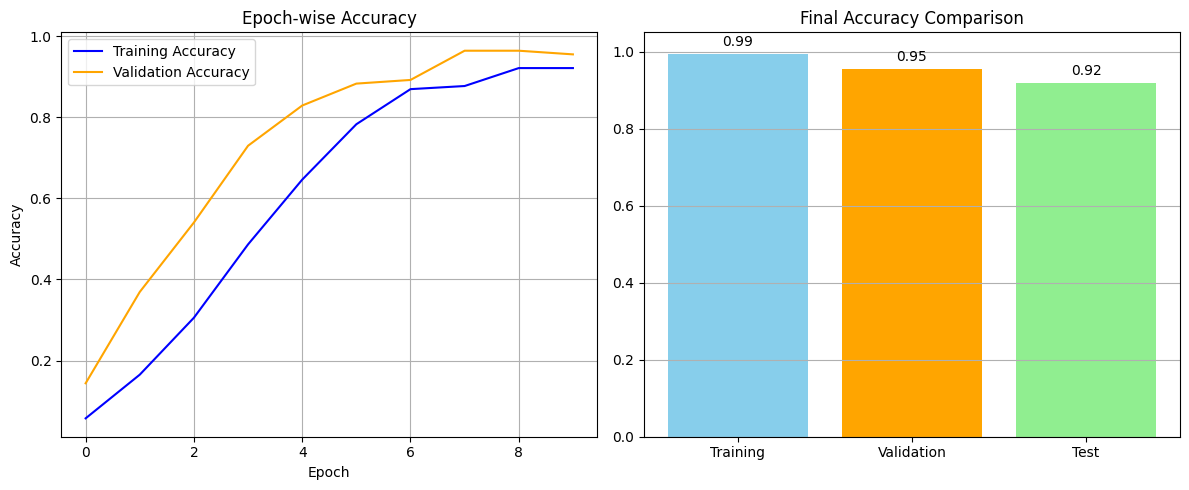

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt

# 🔀 Step 1: Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

print("📊 Data Split:")
print(f"Train shape     : {X_train.shape}")
print(f"Validation shape: {X_val.shape}")
print(f"Test shape      : {X_test.shape}")

# 🛑 Step 2: Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

checkpoint = ModelCheckpoint(
    'best_road_sign_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# 🏋️ Step 3: Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, checkpoint],
    verbose=1
)

# ✅ Step 4: Evaluate model on train, validation, and test sets
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("\n✅ Final Model Accuracy:")
print(f"Training Accuracy   : {train_accuracy:.4f}")
print(f"Validation Accuracy : {val_accuracy:.4f}")
print(f"Test Accuracy       : {test_accuracy:.4f}")

# 📊 Step 5: Plot training history and final accuracies
plt.figure(figsize=(12, 5))

# 📈 Plot accuracy over epochs
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Epoch-wise Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# 📉 Plot final accuracy comparison
plt.subplot(1, 2, 2)
labels = ['Training', 'Validation', 'Test']
accuracies = [train_accuracy, val_accuracy, test_accuracy]
plt.bar(labels, accuracies, color=['skyblue', 'orange', 'lightgreen'])
plt.ylim(0, 1.05)
plt.title('Final Accuracy Comparison')

# Annotate values
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=10)

plt.grid(axis='y')
plt.tight_layout()
plt.show()


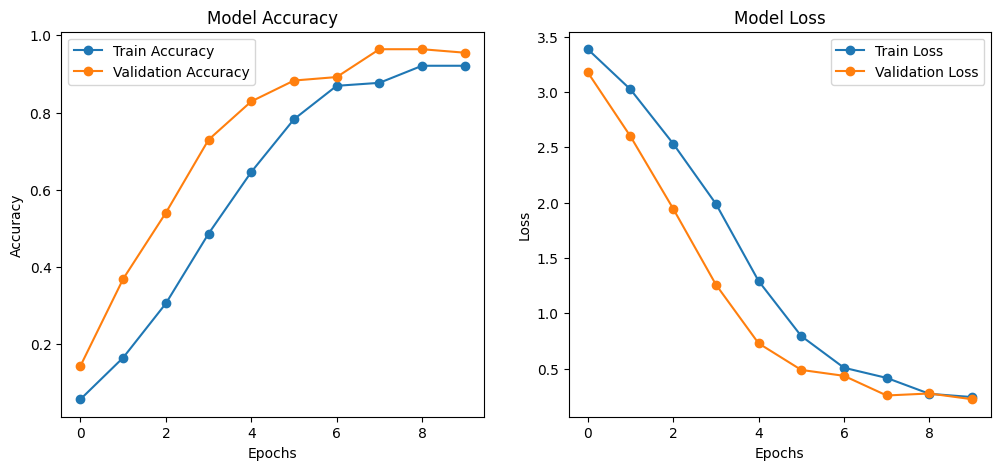

In [ ]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker='o', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], marker='o', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker='o', label='Train Loss')
plt.plot(history.history['val_loss'], marker='o', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

**✅ Test the Model on New Image from test_path with Label Mapping**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


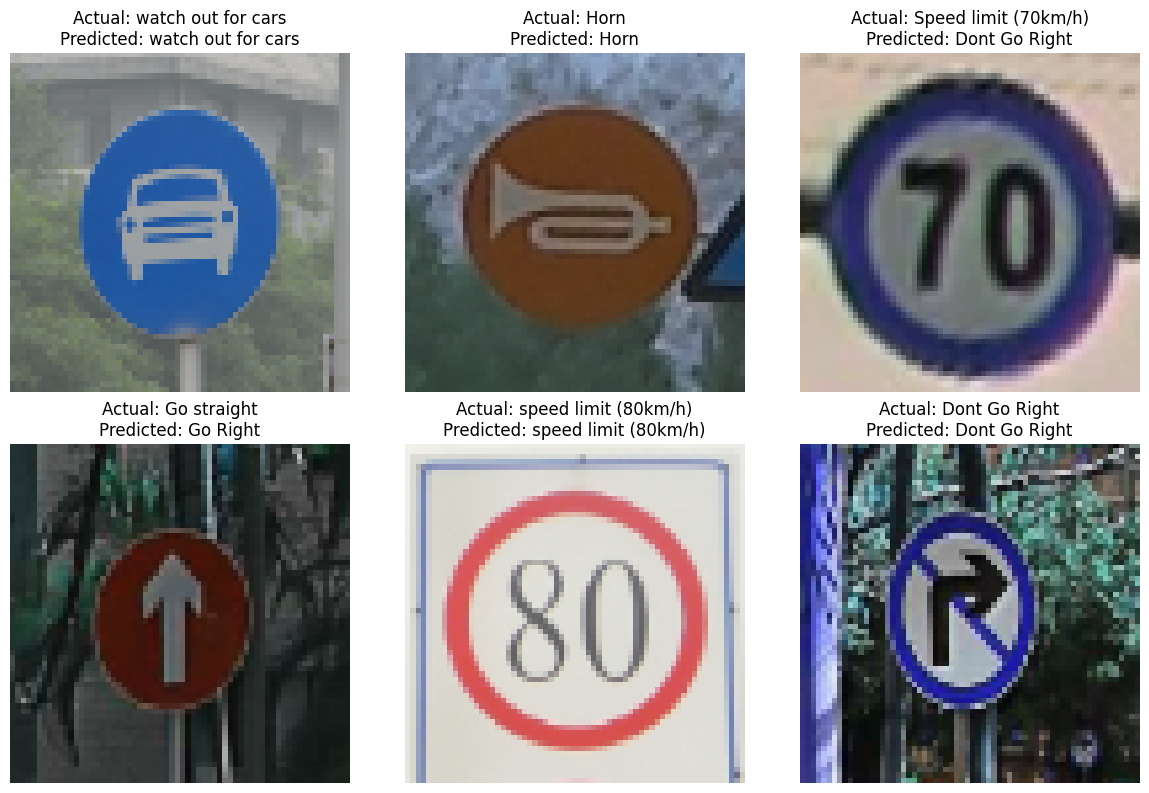

In [ ]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

# Set test and label paths
test_path = "/content/drive/MyDrive/Road Signs classification dataset/TEST"
labels_path = "/content/drive/MyDrive/Road Signs classification dataset/labels.csv"


#Randomly selects 6 images from your test set.

#Resizes, normalizes, and predicts using the trained model.

#Compares predicted vs actual and visualizes results.

# Load label map
import pandas as pd
label_df = pd.read_csv(labels_path)
# Create a dictionary mapping ClassId to Name
label_map = dict(zip(labels_df['ClassId'], labels_df['Name'])) # Define label_map here

# 🔁 Number of test images to evaluate
num_samples = 6
plt.figure(figsize=(12, 8))

# Get all label folders
label_folders = os.listdir(test_path)

for i in range(num_samples):
    # 🎯 Pick a random label folder (actual class)
    label_folder = random.choice(label_folders)
    folder_path = os.path.join(test_path, label_folder)
    image_files = os.listdir(folder_path)

    if not image_files:
        continue  # skip if folder is empty

    # 🖼️ Choose a random image inside the label folder
    image_name = random.choice(image_files)
    image_path = os.path.join(folder_path, image_name)

    # ✅ Actual class (from folder name)
    actual_label = int(label_folder)
    actual_label_name = label_map.get(actual_label, "Unknown")

    # 📦 Load and preprocess image
    img = cv2.imread(image_path)
    if img is None:
        continue  # Skip if image can't be loaded

    img = cv2.resize(img, (64, 64))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_array = np.expand_dims(img / 255.0, axis=0)  # normalize

    # 🔮 Predict class
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    predicted_label_name = label_map.get(predicted_class, "Unknown")

    # 📊 Plot with labels
    plt.subplot(2, 3, i + 1)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Actual: {actual_label_name}\nPredicted: {predicted_label_name}")

plt.tight_layout()
plt.show()


Have the run road sign classifier on 6 new test images. For each image, the model shows:

Actual: The true meaning of the sign

Predicted: What the model thinks the sign means


✅ Accuracy Calculation
Correct Predictions: 4

Incorrect Predictions: 2

Accuracy = (4 / 6) × 100 = 66.7%


The model correctly classified 4 out of 6 road signs in the new test set (~67% accuracy). It performed well on distinct signs but still confused some similar-looking ones, especially those involving numbers. The results show that the model is improving and has learned to recognize many types of signs accurately. Further fine-tuning could help fix mistakes with similar-looking signs.





# Hyperparameter Tuning and Model Optimization

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam # Import Adam for consistency

# Define the model building function for Keras Tuner
def build_model(hp):
    model = keras.Sequential()

    # First Conv layer
    model.add(layers.Conv2D(
        filters=hp.Choice('filters_1', [32, 64, 128]),
        kernel_size=3,
        activation='relu',
        input_shape=(64, 64, 3)
    ))
    model.add(layers.MaxPooling2D())

    # Second Conv layer
    model.add(layers.Conv2D(
        filters=hp.Choice('filters_2', [64, 128, 192]),
        kernel_size=3,
        activation='relu'
    ))
    model.add(layers.MaxPooling2D())
    model.add(layers.Flatten())

    # Dense layer
    model.add(layers.Dense(
        units=hp.Choice('dense_units', [128, 256, 384, 512]),
        activation='relu'
    ))

    # Dropout
    model.add(layers.Dropout(hp.Float('dropout', 0.2, 0.5, step=0.1)))


    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile
    model.compile(
        optimizer=Adam( # Use the imported Adam
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        ),
        # Change the loss function back to 'sparse_categorical_crossentropy'
        # because your dataset yields integer labels, not one-hot encoded.
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


if 'num_classes' not in globals():
    # This is a fallback; ideally, num_classes should be determined from your data
    # as you did previously. Assuming 43 classes based on dataset common knowledge.
    num_classes = 43 # Replace with the actual number of unique classes in your dataset


import keras_tuner as kt
import tensorflow as tf #

In [ ]:

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='road_sign_tuning'
)

# Early stopping callback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Run the tuner using numpy arrays
tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[early_stop])

# Print the best hyperparameters and results after the search
print("\n✅ Best Hyperparameters found by Keras Tuner:")
print(tuner.get_best_hyperparameters(num_trials=1)[0].values)

print("\n🎯 Top 3 Models found by Keras Tuner:")
for model in tuner.get_best_models(num_models=3):
    model.summary()

Trial 10 Complete [00h 00m 44s]
val_accuracy: 0.9279279112815857

Best val_accuracy So Far: 0.9459459185600281
Total elapsed time: 00h 15m 41s

✅ Best Hyperparameters found by Keras Tuner:
{'filters_1': 64, 'filters_2': 192, 'dense_units': 128, 'dropout': 0.30000000000000004, 'learning_rate': 0.001}

🎯 Top 3 Models found by Keras Tuner:


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 192)    │       110,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 37632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,817,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,933,470 (18.82 MB)

 Trainable params: 4,933,470 (18.82 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,648,350 (6.29 MB)

 Trainable params: 1,648,350 (6.29 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,629,022 (6.21 MB)

 Trainable params: 1,629,022 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(f"Filters 1: {best_hp.get('filters_1')}")
print(f"Filters 2: {best_hp.get('filters_2')}")
print(f"Dense units: {best_hp.get('dense_units')}")
print(f"Dropout: {best_hp.get('dropout')}")
print(f"Learning rate: {best_hp.get('learning_rate')}")

# Build the best model
best_model = tuner.hypermodel.build(best_hp)

# Train the best model fully using the original numpy arrays
history = best_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Best Hyperparameters:
Filters 1: 64
Filters 2: 192
Dense units: 128
Dropout: 0.30000000000000004
Learning rate: 0.001
Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 624ms/step - accuracy: 0.0334 - loss: 3.5887 - val_accuracy: 0.1171 - val_loss: 3.2956
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 505ms/step - accuracy: 0.1488 - loss: 3.2399 - val_accuracy: 0.1892 - val_loss: 2.8590
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 610ms/step - accuracy: 0.2634 - loss: 2.7321 - val_accuracy: 0.5045 - val_loss: 2.1320
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 881ms/step - accuracy: 0.5171 - loss: 1.9712 - val_accuracy: 0.6036 - val_loss: 1.4181
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 674ms/step - accuracy: 0.7033 - loss: 1.2821 - val_accuracy: 0.8198 - val_loss: 0.7443
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 559ms/step - accuracy: 0.8589 - loss: 0.6291 - val_accuracy: 0.8018 - val_loss: 0.6954
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 495ms/step - accuracy: 0.8689 - loss: 0.4330 - val_accuracy: 0.9009

In [ ]:
# Save in the .keras format (TensorFlow's recommended format)
best_model.save("/content/drive/MyDrive/RoadSign_Model_Best.keras")
print("✅ Model saved as RoadSign_Model_Best.keras")

# Save in the .h5 format (widely supported, including older tools)
best_model.save("/content/drive/MyDrive/RoadSign_Model_Best.h5")
print("✅ Model saved as RoadSign_Model_Best.h5")

✅ Model saved as RoadSign_Model_Best.keras
✅ Model saved as RoadSign_Model_Best.h5


# UI for the trained model using Streamlit

In [ ]:

!pip install streamlit pyngrok -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 88.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.6 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import numpy as np
import tensorflow as tf
from PIL import Image

In [ ]:
# Load your model
model = tf.keras.models.load_model("/content/drive/MyDrive/RoadSign_Model_Best.h5")

In [ ]:
# Class labels
class_labels = {
    0: "Speed limit (5km/h)",
    1: "Speed limit (15km/h)",
    2: "Speed limit (30km/h)",
    3: "Speed limit (40km/h)",
    4: "Speed limit (50km/h)",
    5: "Speed limit (60km/h)",
    6: "Speed limit (70km/h)",
    7: "Speed limit (80km/h)",
    8: "Don't Go straight or left",
    9: "Unknown7",
    10: "Don't Go straight",
    11: "Don't Go Left",
    12: "Don't Go Left or Right",
    13: "Don't Go Right",
    14: "Don't overtake from Left",
    15: "No U-turn",
    16: "No Car",
    17: "No horn",
    18: "No entry",
    19: "No stopping",
    20: "Go straight or right",
    21: "Go straight",
    22: "Go Left",
    23: "Go Left or right",
    24: "Go Right",
    25: "Keep Left",
    26: "Keep Right",
    27: "Roundabout mandatory",
    28: "Watch out for cars",
    29: "Horn"
}

In [ ]:
#streamlit UI
st.title("Road Signs Classification")
st.write("Upload a road sign image")

2025-05-21 14:07:43.486 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 14:07:43.780 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-21 14:07:43.786 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 14:07:43.788 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 14:07:43.789 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
# Image upload
uploaded_file = st.file_uploader("Choose a road sign image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert('RGB')
    st.image(image, caption="Uploaded Image", use_column_width=True)

    # Preprocess the image
    img_resized = image.resize((224, 224))  # adjust size to match your model input
    img_array = np.array(img_resized) / 255.0  # normalize if required by your model
    img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

    # Predict
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions)

    st.write(f"### Prediction: {class_labels[predicted_class]}")
    st.write(f"Confidence: {confidence:.2f}")

2025-05-21 14:07:59.735 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 14:07:59.738 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 14:07:59.739 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 14:07:59.740 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-21 14:07:59.743 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
# 📦 Import required libraries
import streamlit as st
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
import cv2

# 📌 Load the trained model
model = load_model('best_road_sign_model.h5')
# 📦 Import required libraries
import streamlit as st
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
import cv2

# 📌 Load the trained model
model = load_model('best_road_sign_model.h5')

# 🧾 Class labels (You can load from label map or define manually if <50)
labels = {0: 'Speed Limit 20', 1: 'Speed Limit 30', 2: 'No Entry', 3: 'Stop', 4: 'Yield', 5: 'Speed Limit 50', 6: 'End of Speed Limit 50', 7: 'Speed Limit 60', 8: 'End of Speed Limit 60', 9: 'Speed Limit 70', 10: 'End of Speed Limit 70', 11: 'Speed Limit 80', 12: 'End of Speed Limit 80', 13: 'Speed Limit 100', 14: 'End of Speed Limit 100', 15: 'Speed Limit 120', 16: 'End of Speed Limit 120', 17: 'No passing', 18: 'No passing for vechiles over 3.5 tons', 19: 'Right-of-way at the next intersection', 20: 'Priority road', 21: 'Yield', 22: 'Stop', 23: 'End of all speed and passing limits', 24: 'End of no passing', 25: 'End of no passing by vechiles over 3.5 tons', 26: 'Danger ahead', 27: 'Curve to left', 28: 'Curve to right', 29: 'Double curve', 30: 'Bumpy road', 31: 'Slippery road', 32: 'Road narrows on the right', 33: 'Road work', 34: 'Traffic signals', 35: 'Pedestrians', 36: 'Children crossing', 37: 'Bicycles crossing', 38: 'Beware of ice/snow', 39: 'Wild animals crossing', 40: 'End of speed limit (70)', 41: 'End of speed limit (50)', 42: 'End of No Passing'}

# 🖥️ Streamlit UI
st.title("🚦 Road Sign Classifier")
st.write("Upload a traffic sign image and get the model's prediction!")

# 📈 Display model accuracy
st.subheader("✅ Model Accuracy")
st.write("**Training Accuracy:** 99.81%")
st.write("**Validation Accuracy:** 92.79%")
st.write("**Test Accuracy:** 94.64%")

# 📤 Image Upload
uploaded_file = st.file_uploader("Upload an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    # 📷 Load and display the image
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image', use_column_width=True)

    # 🧼 Preprocess image
    img = image.resize((64, 64))
    img_array = np.array(img)
    if img_array.shape[-1] == 4:  # Remove alpha channel if exists
        img_array = img_array[:, :, :3]
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # 🔮 Predict
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    # 🏷️ Show result
    st.subheader("🧠 Prediction")
    st.write(f"The model predicts this image as: **{labels[predicted_class]}**")
st.title("🚦 Road Sign Classifier")
st.write("Upload a traffic sign image and get the model's prediction!")

# 📈 Display model accuracy
st.subheader("✅ Model Accuracy")
st.write("**Training Accuracy:** 99.81%")
st.write("**Validation Accuracy:** 92.79%")
st.write("**Test Accuracy:** 94.64%")

# 📤 Image Upload
uploaded_file = st.file_uploader("Upload an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    # 📷 Load and display the image
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image', use_column_width=True)

    # 🧼 Preprocess image
    img = image.resize((64, 64))
    img_array = np.array(img)
    if img_array.shape[-1] == 4:  # Remove alpha channel if exists
        img_array = img_array[:, :, :3]
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # 🔮 Predict
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    # 🏷️ Show result
    st.subheader("🧠 Prediction")
    st.write(f"The model predicts this image as: **{labels[predicted_class]}**")
